# Prune Dataset to extract representative subset

In this notebook example, we are going to make pruned dataset, which is representative subset of dataset. Through this, 

## Prerequisite 
### Download COCO 2017 validation dataset 
Please refer [this notebook](https://openvinotoolkit.github.io/datumaro/latest/docs/jupyter_notebook_examples/notebooks/03_visualize.html) for preparing COCO 2017 validation dataset.

In [1]:
# Copyright (C) 2023 Intel Corporation
#
# SPDX-License-Identifier: MIT

import datumaro as dm
from datumaro.components.prune import Prune
from datumaro.components.visualizer import Visualizer
from datumaro.plugins.validators import ClassificationValidator, DetectionValidator, SegmentationValidator

from matplotlib import pyplot as plt

/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cls_path = "/media/hdd2/datumaro/cifar100_test"
cls_data = dm.Dataset.import_from(cls_path, format="cifar")
cls_data

Dataset
	size=9999
	source_path=/media/hdd2/datumaro/cifar100_test
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=9999
	annotations_count=9999
subsets
	test: # of items=9999, # of annotated items=9999, # of annotations=9999, annotation types=['label']
infos
	categories
	label: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon',

In [3]:
labels = list([label._indices.keys() for label in cls_data.categories().values()][0])

In [4]:
validator = ClassificationValidator()
reports = validator.validate(cls_data)

In [5]:
reports['statistics']

{'label_distribution': {'defined_labels': {'apple': 100,
   'aquarium_fish': 100,
   'baby': 100,
   'bear': 100,
   'beaver': 100,
   'bed': 100,
   'bee': 100,
   'beetle': 100,
   'bicycle': 100,
   'bottle': 100,
   'bowl': 100,
   'boy': 100,
   'bridge': 100,
   'bus': 100,
   'butterfly': 100,
   'camel': 100,
   'can': 100,
   'castle': 100,
   'caterpillar': 100,
   'cattle': 100,
   'chair': 100,
   'chimpanzee': 100,
   'clock': 100,
   'cloud': 100,
   'cockroach': 100,
   'couch': 100,
   'crab': 100,
   'crocodile': 100,
   'cup': 100,
   'dinosaur': 100,
   'dolphin': 100,
   'elephant': 100,
   'flatfish': 100,
   'forest': 100,
   'fox': 100,
   'girl': 99,
   'hamster': 100,
   'house': 100,
   'kangaroo': 100,
   'keyboard': 100,
   'lamp': 100,
   'lawn_mower': 100,
   'leopard': 100,
   'lion': 100,
   'lizard': 100,
   'lobster': 100,
   'man': 100,
   'maple_tree': 100,
   'motorcycle': 100,
   'mountain': 100,
   'mouse': 100,
   'mushroom': 100,
   'oak_tree': 

In [6]:
reports["statistics"].keys()

dict_keys(['label_distribution', 'attribute_distribution', 'total_ann_count', 'items_missing_annotation', 'items_with_multiple_labels'])

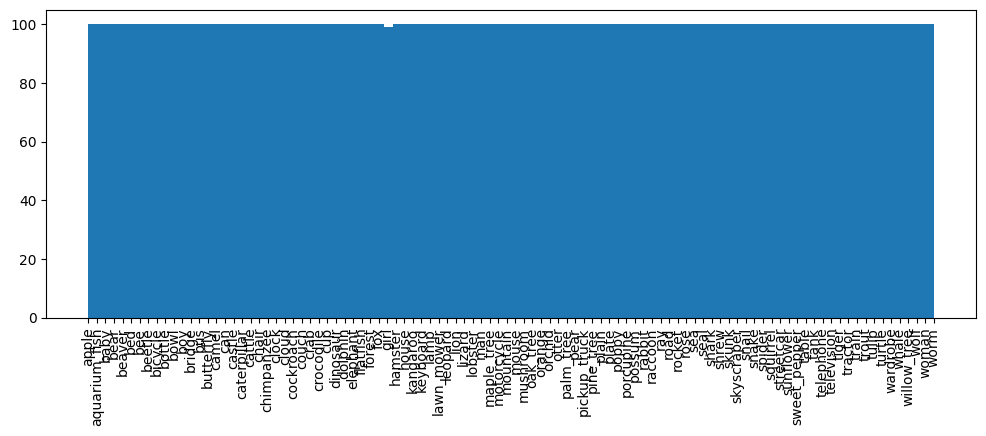

In [7]:
stats = reports["statistics"]

label_stats = stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [8]:
prune = Prune(cls_data, cluster_method='random')
random_result = prune.get_pruned(0.5)

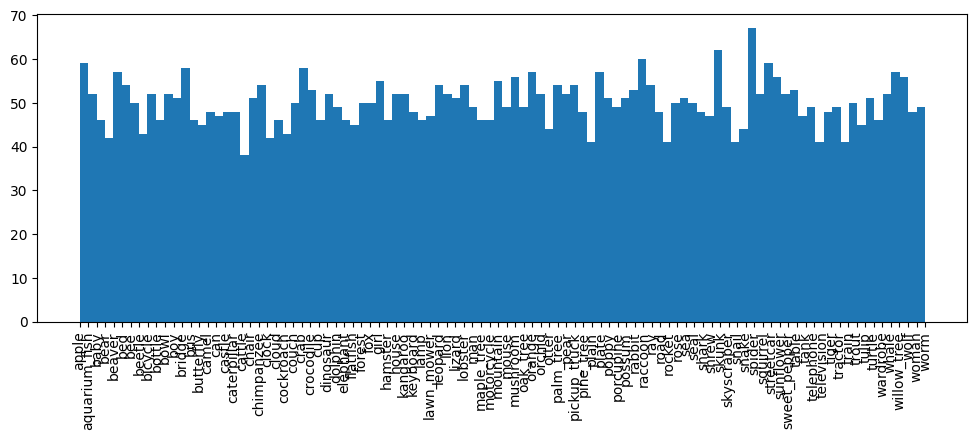

In [9]:
random_reports = validator.validate(random_result)

random_stats = random_reports["statistics"]

label_stats = random_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [10]:
prune = Prune(cls_data, cluster_method='cluster_random')
cluster_random_result = prune.get_pruned(0.5)

/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/cluster/_kmeans.py:1421: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/base.py:1148: ConvergenceWarning: Number of distinct clusters (64) found smaller than n_clusters (100). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


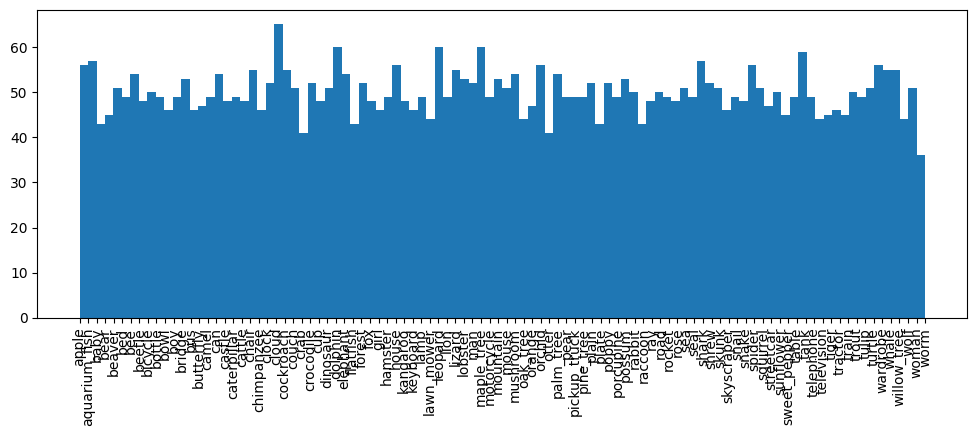

In [11]:
cluster_random_reports = validator.validate(cluster_random_result)

cluster_random_stats = cluster_random_reports["statistics"]

label_stats = cluster_random_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [3]:
prune = Prune(cls_data, cluster_method='query_clust')
query_clust_result = prune.get_pruned(0.5)

/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/base.py:1148: ConvergenceWarning: Number of distinct clusters (64) found smaller than n_clusters (100). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


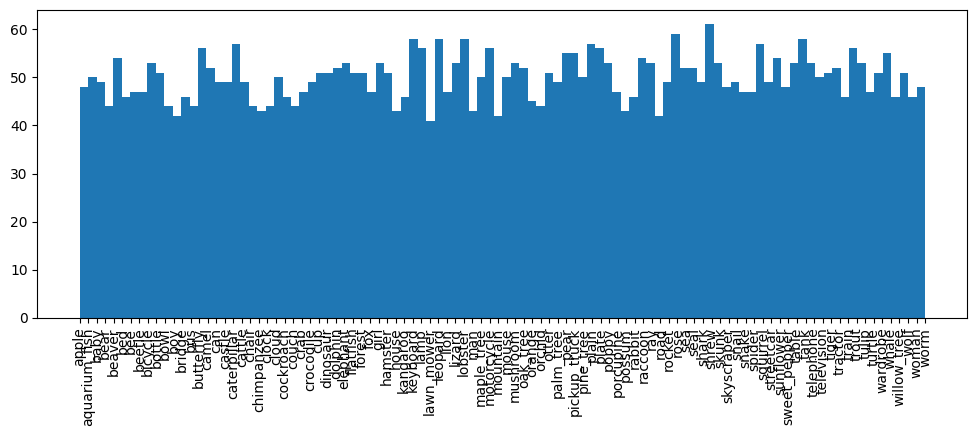

In [6]:
query_clust_reports = validator.validate(query_clust_result)

query_clust_stats = query_clust_reports["statistics"]

label_stats = query_clust_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [7]:
prune = Prune(cls_data, cluster_method='centroid')
centroid_result = prune.get_pruned(0.5)

/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/cluster/_kmeans.py:1421: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/base.py:1148: ConvergenceWarning: Number of distinct clusters (64) found smaller than n_clusters (5000). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


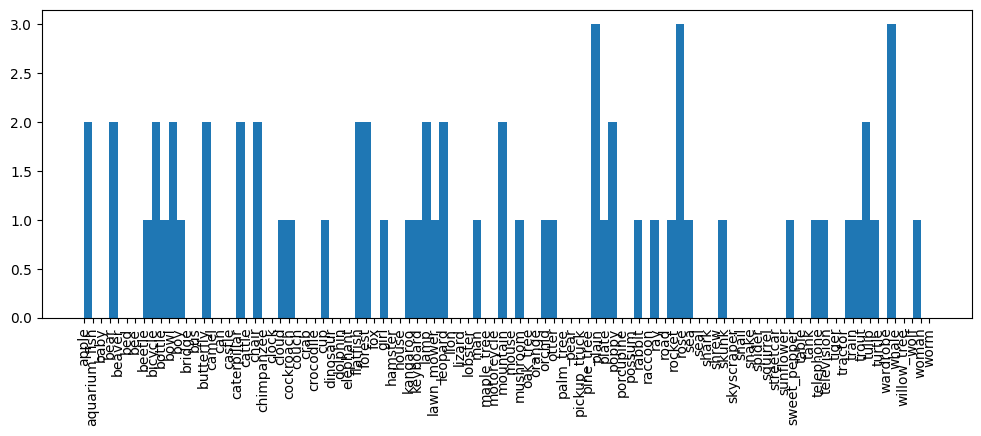

In [8]:
centroid_reports = validator.validate(centroid_result)

centroid_stats = centroid_reports["statistics"]

label_stats = centroid_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [5]:
prune = Prune(cls_data, cluster_method='entropy')
entropy_result = prune.get_pruned(0.5)

/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/cluster/_kmeans.py:1421: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/base.py:1148: ConvergenceWarning: Number of distinct clusters (64) found smaller than n_clusters (100). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


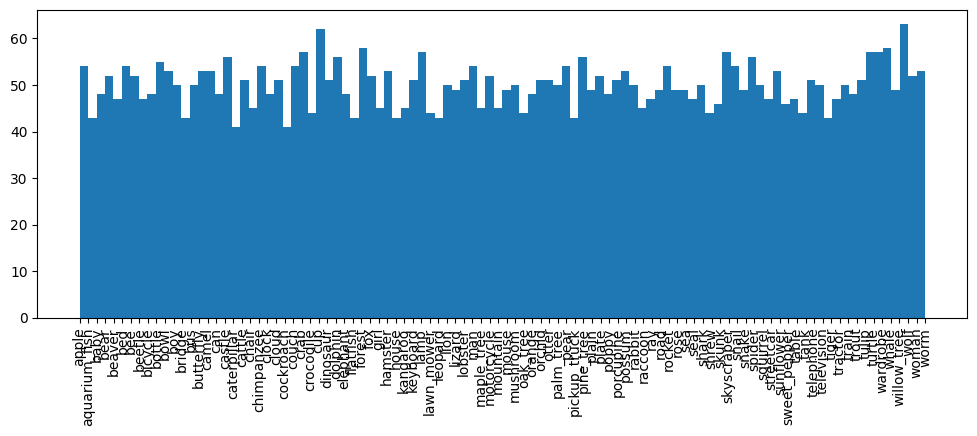

In [6]:
entropy_reports = validator.validate(entropy_result)

entropy_stats = entropy_reports["statistics"]

label_stats = entropy_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [7]:
prune = Prune(cls_data, cluster_method='ndr')
ndr_result = prune.get_pruned(0.5)

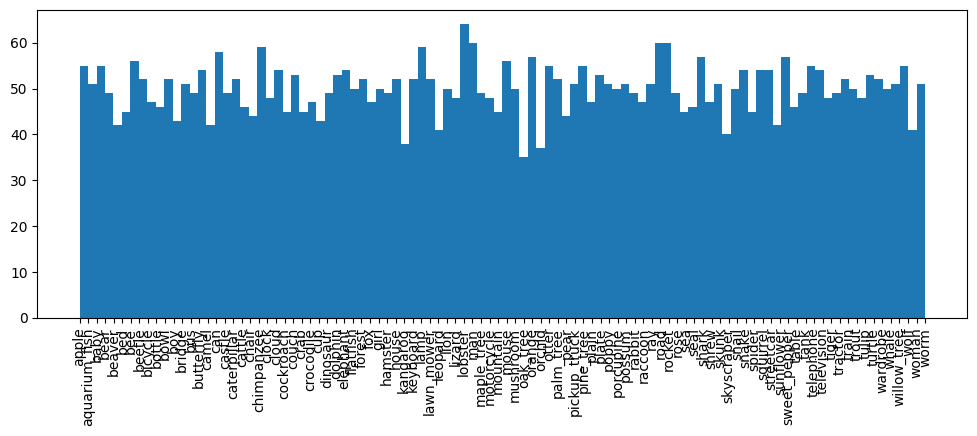

In [8]:
ndr_reports = validator.validate(ndr_result)

ndr_stats = ndr_reports["statistics"]

label_stats = ndr_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [2]:
from datumaro.components.dataset import Dataset

path = "coco_dataset"
dataset = Dataset.import_from(path, "coco_instances")

print("Representation for sample COCO dataset")
dataset

Representation for sample COCO dataset


Dataset
	size=5000
	source_path=coco_dataset
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=4952
	annotations_count=78647
subsets
	val2017: # of items=5000, # of annotated items=4952, # of annotations=78647, annotation types=['mask', 'bbox', 'polygon']
infos
	categories
	label: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 

In [3]:
labels = list([label._indices.keys() for label in dataset.categories().values()][0])

In [4]:
extra_args = {
    "few_samples_thr": 100,
    "imbalance_ratio_thr": 5,
    "far_from_mean_thr": 20.0,
}

validator = DetectionValidator(**extra_args)
reports = validator.validate(dataset)

In [5]:
reports['statistics']

{'label_distribution': {'defined_labels': {'person': 11004,
   'bicycle': 316,
   'car': 1932,
   'motorcycle': 371,
   'airplane': 143,
   'bus': 285,
   'train': 190,
   'truck': 415,
   'boat': 430,
   'traffic light': 637,
   'fire hydrant': 101,
   'stop sign': 75,
   'parking meter': 60,
   'bench': 413,
   'bird': 440,
   'cat': 202,
   'dog': 218,
   'horse': 273,
   'sheep': 361,
   'cow': 380,
   'elephant': 255,
   'bear': 71,
   'zebra': 268,
   'giraffe': 232,
   'backpack': 371,
   'umbrella': 413,
   'handbag': 540,
   'tie': 254,
   'suitcase': 303,
   'frisbee': 115,
   'skis': 241,
   'snowboard': 69,
   'sports ball': 263,
   'kite': 336,
   'baseball bat': 146,
   'baseball glove': 148,
   'skateboard': 179,
   'surfboard': 269,
   'tennis racket': 225,
   'bottle': 1025,
   'wine glass': 343,
   'cup': 899,
   'fork': 215,
   'knife': 326,
   'spoon': 253,
   'bowl': 626,
   'banana': 379,
   'apple': 239,
   'sandwich': 177,
   'orange': 287,
   'broccoli': 316,
 

In [6]:
reports["statistics"].keys()

dict_keys(['label_distribution', 'attribute_distribution', 'total_ann_count', 'items_missing_annotation', 'items_with_negative_length', 'items_with_invalid_value', 'point_distribution_in_label', 'point_distribution_in_attribute', 'point_distribution_in_dataset_item'])

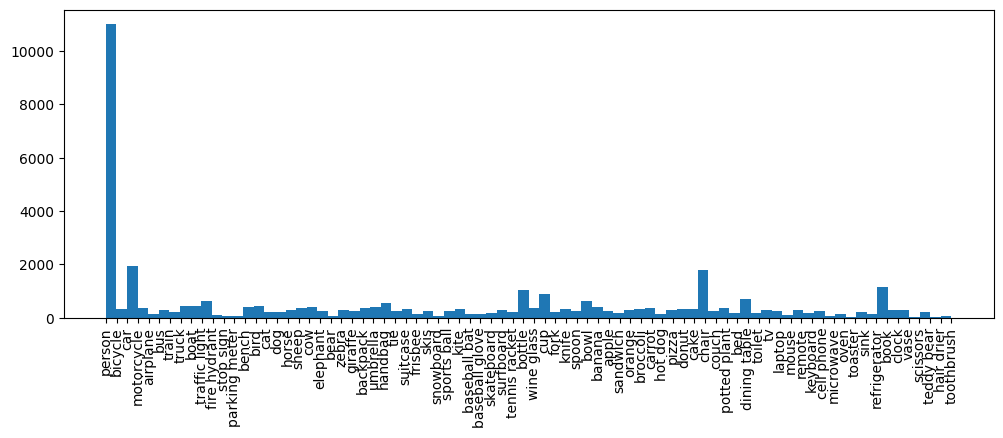

In [7]:
stats = reports["statistics"]

label_stats = stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [15]:
prune = Prune(dataset, cluster_method='random')
random_result = prune.get_pruned(0.5)

In [16]:
random_result

Dataset
	size=2500
	source_path=coco_dataset
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=2478
	annotations_count=38594
subsets
	val2017: # of items=2500, # of annotated items=2478, # of annotations=38594, annotation types=['mask', 'bbox', 'polygon']
infos
	categories
	label: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 

In [17]:
random_reports = validator.validate(random_result)

In [18]:
random_stats = random_reports["statistics"]

label_stats = random_stats["label_distribution"]["defined_labels"]
random_stats

{'label_distribution': {'defined_labels': {'person': 5351,
   'bicycle': 165,
   'car': 993,
   'motorcycle': 183,
   'airplane': 83,
   'bus': 157,
   'train': 77,
   'truck': 218,
   'boat': 220,
   'traffic light': 333,
   'fire hydrant': 50,
   'stop sign': 42,
   'parking meter': 21,
   'bench': 217,
   'bird': 254,
   'cat': 96,
   'dog': 111,
   'horse': 152,
   'sheep': 158,
   'cow': 169,
   'elephant': 101,
   'bear': 33,
   'zebra': 163,
   'giraffe': 119,
   'backpack': 167,
   'umbrella': 195,
   'handbag': 251,
   'tie': 135,
   'suitcase': 178,
   'frisbee': 48,
   'skis': 105,
   'snowboard': 35,
   'sports ball': 161,
   'kite': 168,
   'baseball bat': 78,
   'baseball glove': 64,
   'skateboard': 94,
   'surfboard': 151,
   'tennis racket': 127,
   'bottle': 519,
   'wine glass': 181,
   'cup': 434,
   'fork': 105,
   'knife': 130,
   'spoon': 115,
   'bowl': 277,
   'banana': 167,
   'apple': 134,
   'sandwich': 81,
   'orange': 174,
   'broccoli': 204,
   'carrot': 

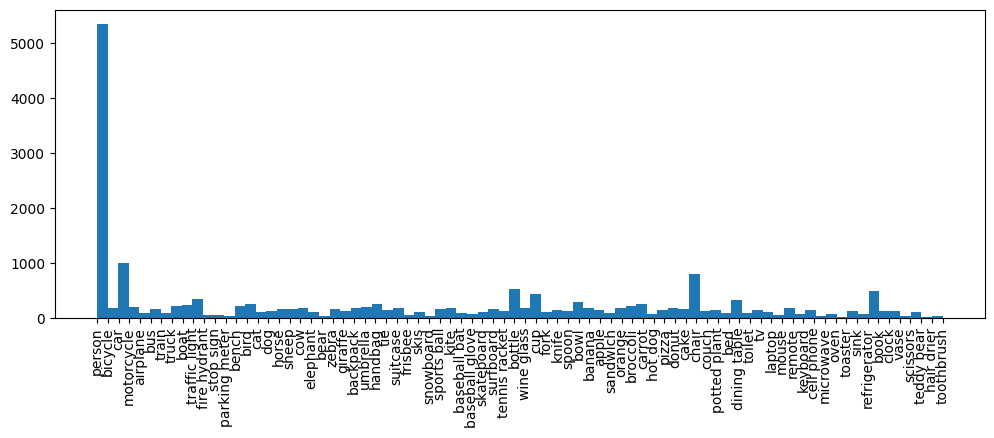

In [19]:
random_stats = random_reports["statistics"]

label_stats = random_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [20]:
prune = Prune(dataset, cluster_method='cluster_random')
cluster_random_result = prune.get_pruned(0.5)

/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/cluster/_kmeans.py:1421: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/base.py:1148: ConvergenceWarning: Number of distinct clusters (48) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [21]:
cluster_random_reports = validator.validate(cluster_random_result)

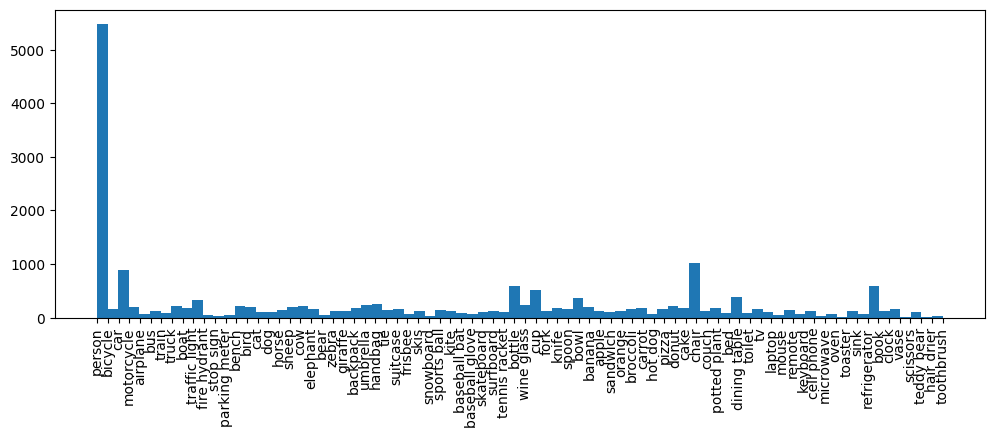

In [22]:
cluster_random_stats = cluster_random_reports["statistics"]

label_stats = cluster_random_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [8]:
prune = Prune(dataset, cluster_method='query_clust')
query_clust_result = prune.get_pruned(0.5)

/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/base.py:1148: ConvergenceWarning: Number of distinct clusters (48) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [10]:
query_clust_reports = validator.validate(query_clust_result)

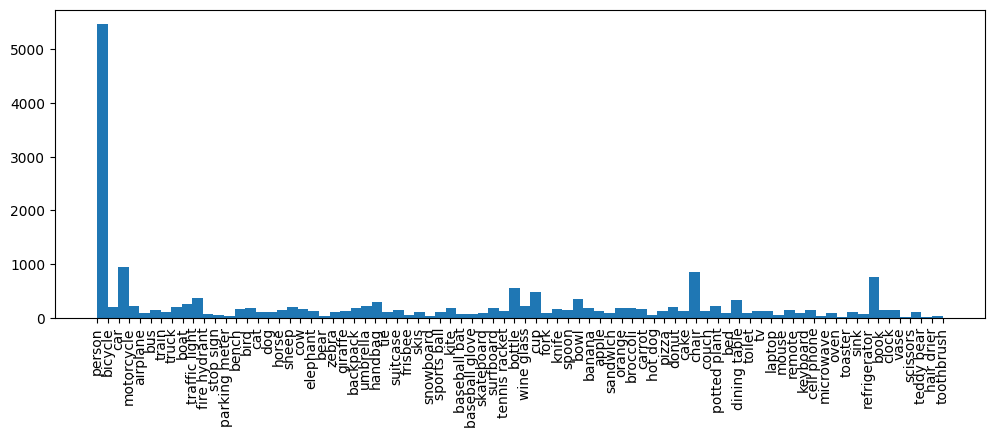

In [11]:
query_clust_stats = query_clust_reports["statistics"]

label_stats = query_clust_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [12]:
prune = Prune(dataset, cluster_method='centroid')
centroid_result = prune.get_pruned(0.5)

/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/cluster/_kmeans.py:1421: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/base.py:1148: ConvergenceWarning: Number of distinct clusters (48) found smaller than n_clusters (2500). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [13]:
centroid_reports = validator.validate(centroid_result)

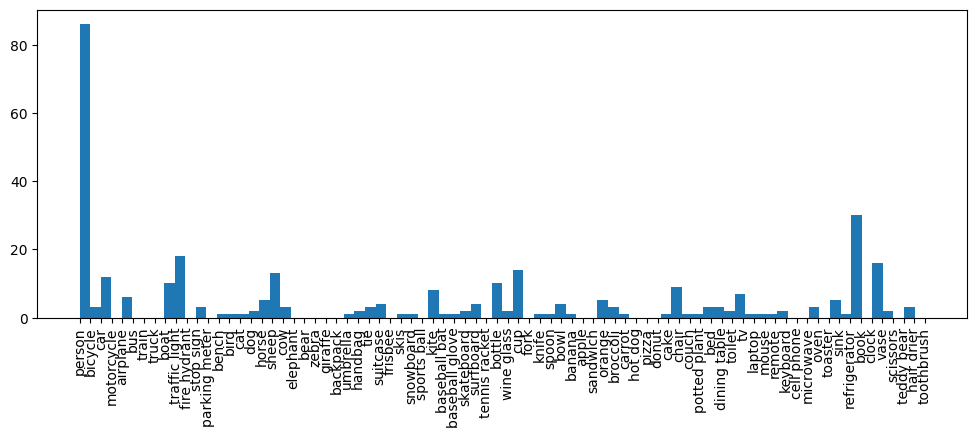

In [14]:
centroid_stats = centroid_reports["statistics"]

label_stats = centroid_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [15]:
prune = Prune(dataset, cluster_method='entropy')
entropy_result = prune.get_pruned(0.5)

/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/cluster/_kmeans.py:1421: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/base.py:1148: ConvergenceWarning: Number of distinct clusters (48) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


IndexError: index 15 is out of bounds for axis 0 with size 0

In [26]:
entropy_reports = validator.validate(entropy_result[0])

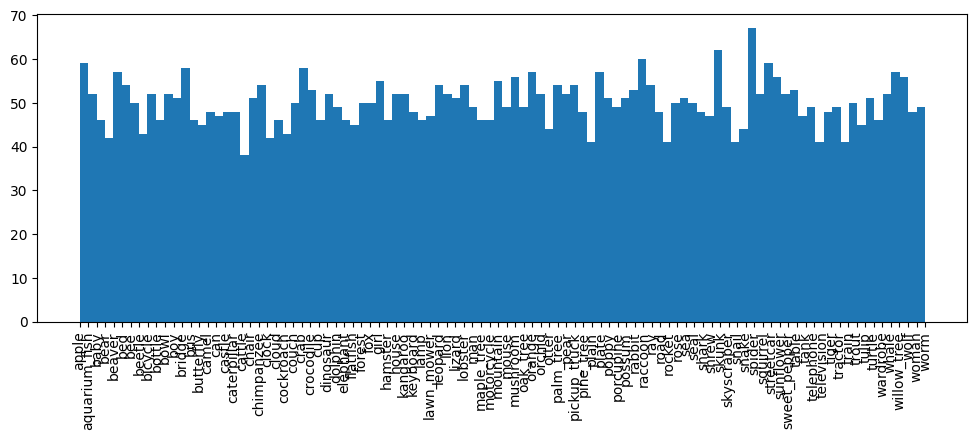

In [27]:
entropy_stats = entropy_reports["statistics"]

label_stats = entropy_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
prune = Prune(dataset, cluster_method='ndr')
ndr_result = prune.get_pruned(0.5)

In [ ]:
ndr_reports = validator.validate(ndr_result[0])

In [ ]:
ndr_stats = ndr_reports["statistics"]

label_stats = ndr_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [2]:
# seg_path = '/media/hdd2/datumaro/PascalVOC12/VOCdevkit/VOC2012'
seg_path = "/media/hdd2/datumaro/VOC2007"
seg_data = dm.Dataset.import_from(seg_path, "voc")

seg_data

Dataset
	size=14974
	source_path=/media/hdd2/datumaro/VOC2007
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=14974
	annotations_count=76636
subsets
	test: # of items=4952, # of annotated items=4952, # of annotations=24318, annotation types=['mask', 'bbox', 'label']
	train: # of items=2501, # of annotated items=2501, # of annotations=13155, annotation types=['mask', 'bbox', 'label']
	trainval: # of items=5011, # of annotated items=5011, # of annotations=26159, annotation types=['mask', 'bbox', 'label']
	val: # of items=2510, # of annotated items=2510, # of annotations=13004, annotation types=['mask', 'bbox', 'label']
infos
	categories
	label: ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor', 'ignored', 'head', 'hand', 'foot']
	mask: []

In [3]:
validator = SegmentationValidator()
reports = validator.validate(seg_data)

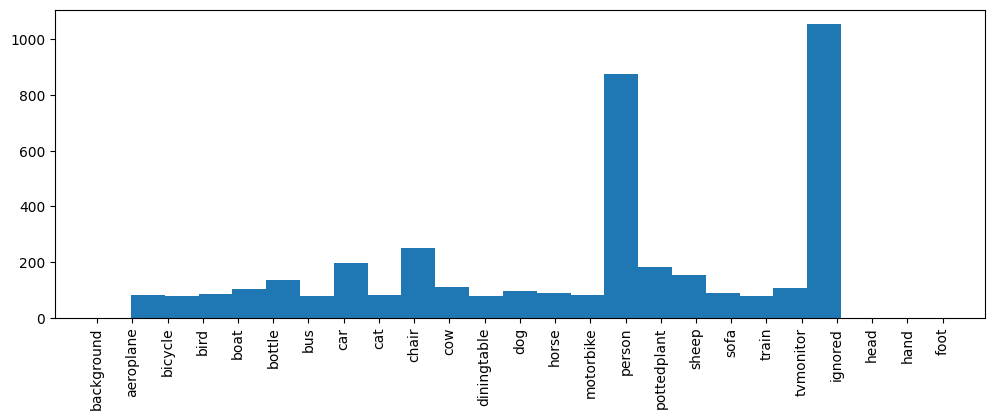

In [4]:
stats = reports["statistics"]

label_stats = stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [5]:
prune = Prune(seg_data, cluster_method='cluster_random')
cluster_random_result = prune.get_pruned(0.5)

/home/dwekr/miniconda3/envs/datum/lib/python3.10/site-packages/scikit_learn-1.3.0rc1-py3.10-linux-x86_64.egg/sklearn/cluster/_kmeans.py:1421: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


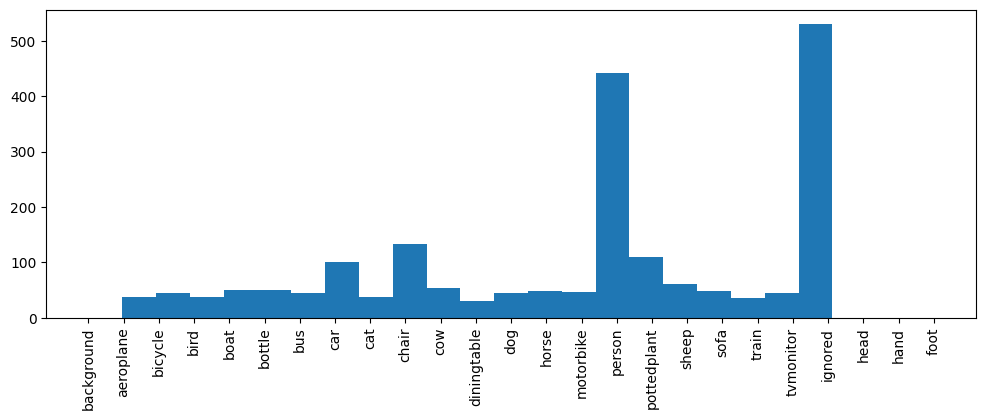

In [6]:
cluster_random_reports = validator.validate(cluster_random_result)

cluster_random_stats = cluster_random_reports["statistics"]
label_stats = cluster_random_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()

In [7]:
prune = Prune(seg_data, cluster_method='query_clust')
query_clust_result = prune.get_pruned(0.5)

AttributeError: 'list' object has no attribute 'id'

In [10]:
i = 0
for item in seg_data:
    if i == 0:
        print(item.annotations)
    i += 1

[Label(id=0, attributes={}, group=0, label=12), Label(id=0, attributes={}, group=0, label=15), Bbox(id=0, attributes={'difficult': False, 'truncated': True, 'occluded': False, 'pose': 'Left'}, group=0, points=[48.0, 240.0, 195.0, 371.0], label=12, z_order=0), Bbox(id=1, attributes={'difficult': False, 'truncated': True, 'occluded': False, 'pose': 'Left', 'takingphoto': False, 'playinginstrument': False, 'jumping': False, 'reading': False, 'phoning': False, 'running': False, 'ridingbike': False, 'ridinghorse': False, 'other': False, 'usingcomputer': False, 'walking': False}, group=1, points=[8.0, 12.0, 352.0, 498.0], label=15, z_order=0), HashKey(id=0, attributes={}, group=0, hash_key=array([169, 227,  17, 210, 206, 226,   8,  15, 100, 236, 223, 167, 140,
       132,  89,  83, 223, 150,  11, 207,  12,  87,  20, 184, 176, 129,
       209,  88, 249, 193,  49, 170, 140,  87,  86, 254, 197,  41, 145,
       214, 122, 208, 205, 175,  45,  17, 179,  67, 172, 188,  41, 171,
        24, 250,  2

In [ ]:
query_clust_reports = validator.validate(query_clust_result)

query_clust_stats = query_clust_reports["statistics"]
label_stats = cluster_random_stats["label_distribution"]["defined_labels"]
label_name, label_counts = zip(*[(k, v) for k, v in label_stats.items()])

plt.figure(figsize=(12, 4))
plt.hist(label_name, weights=label_counts, bins=len(label_name))
plt.xticks(rotation="vertical")
plt.show()